In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/DataPreprocessing.csv")  #copy the path
Mean=np.round(df['MSSubClass'].mean())
print("Mean = ",Mean)

Mean =  58.0


In [ ]:
Std=df["MSSubClass"].std()
Std

47.185135967650226

In [ ]:
df["MSSubClass"]=df["MSSubClass"].apply(lambda x:((x-Mean)/Std)) # we did the standardization using the formula of standard deviation
df["MSSubClass"].describe()

count    1456.000000
mean        0.000975
std         1.000000
min        -0.805338
25%        -0.805338
50%        -0.169545
75%         0.254317
max        11.910530
Name: MSSubClass, dtype: float64

In [ ]:
Mean=np.round(df["LotArea"].mean())
print("Mean = ",Mean)
Std=df["LotArea"].std()
Std
df["LotArea"]=df["LotArea"].apply(lambda x:((x-Mean)/Std)) # we did the standardization using the formula of standard deviation
df["LotArea"].describe()

Mean =  9819.0


count    1459.000000
mean        0.000033
std         1.000000
min        -1.684789
25%        -0.489959
50%        -0.084754
75%         0.342749
max         9.440185
Name: LotArea, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler #note the spelling of Scaler
scalar=StandardScaler()
df["LotArea"]=scalar.fit_transform(df[["LotArea"]]) # fit calls the formula of StansardScaler and transform does the calculation and then shows the output
df["LotArea"]

0       0.363929
1       0.897861
2       0.809646
3       0.032064
4      -0.971808
          ...   
1454   -1.591330
1455   -1.599808
1456    2.055150
1457    0.125527
1458   -0.038790
Name: LotArea, Length: 1459, dtype: float64

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
max_abs=MaxAbsScaler()
df["TotalBsmtSF"]=max_abs.fit_transform(df[["TotalBsmtSF"]])
df["TotalBsmtSF"]

0       0.173111
1       0.260844
2       0.182139
3       0.181747
4       0.251227
          ...   
1454    0.107164
1455    0.107164
1456    0.240236
1457    0.178999
1458    0.195486
Name: TotalBsmtSF, Length: 1459, dtype: float64

In [ ]:
df=pd.read_csv("/content/DataPreprocessing.csv")  #copy the path
m1=df["TotalBsmtSF"].min()
print(m1)
m2=df["TotalBsmtSF"].max()
print(m2)
df["TotalBsmtSF"]=df["TotalBsmtSF"].apply(lambda x:((x-m1)/(m2-m1))) 
print(df["TotalBsmtSF"])

0.0
5095.0
0       0.173111
1       0.260844
2       0.182139
3       0.181747
4       0.251227
          ...   
1454    0.107164
1455    0.107164
1456    0.240236
1457    0.178999
1458    0.195486
Name: TotalBsmtSF, Length: 1459, dtype: float64


In [ ]:
from sklearn.datasets import load_breast_cancer #inbuilt dataset of scikit learn
cancer=load_breast_cancer() # instantiating
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names']) # creating dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar =  StandardScaler()
scalar.fit(df)
scaled_data=scalar.transform(df)
from sklearn.decomposition import PCA  #import pca
pca = PCA(n_components=2)  #let component = 2
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data) 

In [ ]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal component')

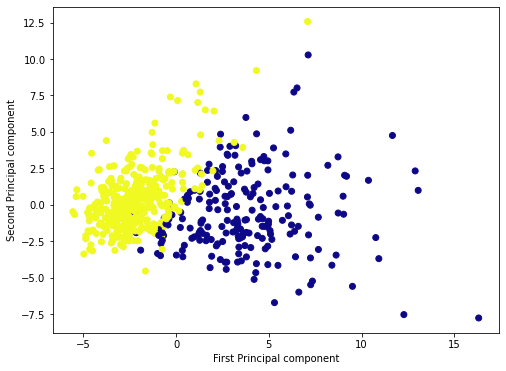

In [ ]:
plt.figure(figsize=(8,6))  # giving a larger plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')

In [ ]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])